<a href="https://colab.research.google.com/github/GeraldShin/PyTorch-Debut/blob/master/PyTorch_Debut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install --trusted-host download.pytorch.org torch==1.4.0+cpu torchvision==0.5.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

#actually it looks like this is now native in Colab, so we don't even have to pip it in anymore

In [0]:
import torch
import torchvision 
#these are the standard modules for PyTorch

import torch.nn as nn 
import torch.nn.functional as F
import torchvision.transforms as transforms 
#these are the modules that are more commonly used in Machine learning applications 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#these are obv

Because this is a "Hello World" introduction into PyTorch, we're going to be using the infamous MNIST dataset. 

PyTorch has a function called DataLoader which will efficiently build batches and feed in the data in subsets. You can set the size of the batch, typically you see 32/64.

FYI: In the context of machine learning, a tensor is a type of data structure that is highly efficient. 

In [3]:
BATCH_SIZE = 32

transform = transforms.Compose( #This is a list of transformations to apply to the data
    [transforms.ToTensor()]
)

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform) #this will import the data from the datasets built into PyTorch and then apply the transformations to it

trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, #reminder: this will load the dataset into the workspace into tensors
                                          shuffle=True, num_workers=2) 

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                      download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                          shuffle=False, num_workers=2) 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [4]:
print(trainset)

print(testset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


**Taking a closer look at the transforms.Compose() function**

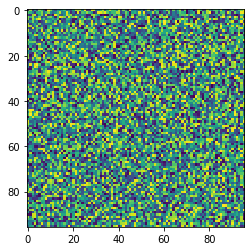

In [5]:
image = transforms.ToPILImage(mode='L')(torch.randn(1, 96, 96))  #this is going to just generate a random image 

plt.imshow(image)

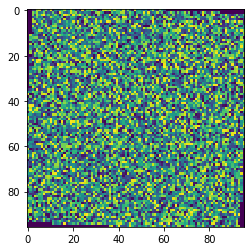

In [6]:
example_transform = transforms.Compose(
    [transforms.RandomRotation(45, fill=(0,)),
     transforms.RandomVerticalFlip()]
    )

example_result = example_transform(image)

plt.imshow(example_result)

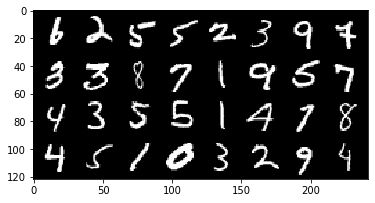

In [7]:
def imshow(img):
  #img = img / 2 + 0.5 #unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
#function to convert the tensor to a numpy array, stack the array using transpose, and then visualize that numpy array

## get randomized training imgs from training dataset
dataiter = iter(trainloader)
images, labels = dataiter.next()


## show images
imshow(torchvision.utils.make_grid(images))

In [8]:
for images, labels in trainloader:
    print("Image batch dimensions:", images.shape) #believe this means there are 32, 28x28 images?
    print("Image label dimensions:", labels.shape)
    break

Image batch dimensions: torch.Size([32, 1, 28, 28])
Image label dimensions: torch.Size([32])


A standard convention for buildling a neural network in PyTorch is to create a class that houses the model. We will call it 'MyModel'

In [0]:
class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()
    self.d1 = nn.Linear(28 * 28, 128) #first hidden layer
    self.dropout = nn.Dropout(p=0.2) #drop out layer
    self.d2 = nn.Linear(128, 10) #final, output layer

  def forward(self, x):
    x = x.flatten(start_dim = 1)
    x = self.d1(x)
    x = F.relu(x)
    x = self.dropout(x)
    logits = self.d2(x)
    out = F.softmax(logits, dim=1)
    return out

  


**Calls** to the Linear function in the neural net package will create a **dense layer** which has the following requirements
```
nn.Linear(in, out)
self.d1 = nn.Linear(28 * 28, 128)
self.d2 = nn.Linear(128, 10)
```


*   In dimensions - These are the dimensions that going in as an input
*   Out dimensions - These are the dimensions getting passed out

Notice that the output for the first layer must match the input for the second layer.  
Also notice that the final output layer is 10 variables wide, one for each digit we're going to estimate.

**Dropout Layers**

Dropout layers is a method used to prevent overfitting, meaning that it is used for regularization.  
Dropout layers will randomly zero out some of the units in the neural network, given the probability. Above, we coded p = 0.2, so 20% of the nodes will zero out. 
```
self.dropout = nn.Dropout(p = 0.2)
```

**The Forward() Function**  
We created the forward function in the class to use on the entry point of the data. Typically we will also put any configurations or modifications we want to perform on the training set before we run it through the network inside this function.  
This is what the function is doing:


1.   Flattening the images - this converts the entire 28*28 image to a 1x784 object


```
x = x.flatten(start_dim = 1)
```


2.   We will take this 1D Array and run it through our first hidden layer


```
x = self.d1(x)
```

3. That output that we get from this layer will then have a **non-linear activation function applied**, here we used **ReLU**. 

```
x = F.relu(x)
```
4.   This is the drop out layer that we talked about. This will help us avoid overfitting our dataset to the training data. 


```
x = self.dropout(x)
```

5.   So now, we take the output created by this dropout layer and then feed it to our second layer, d2. 


```
logits = self.d2(x)
```

6.   The result of this layer is fed into a **softmax** function. This function converts/normalizes outputs into a **probability distribution** which will help us later when we want to find the accuracy of the model. 


```
out = F.softmax(logits, dim=1)
```

7.   This line returns the final output in the variable 'out'. 


```
return out
```

In [0]:
model = MyModel()

for images, labels in trainloader:
  print("batch size:", images.shape)
  out = model(images)